# Reddit Graphs and Correlation

In [60]:
# Import Statements
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# Set Seed
np.random.seed(42)

reddit = pd.read_csv("100yearfulldata.csv")
reddit.info() 

reddit.isna().sum().sum() # There are no NAs in this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               500 non-null    int64  
 1   Title                    500 non-null    object 
 2   ID                       500 non-null    object 
 3   Number of Upvotes        500 non-null    int64  
 4   Percent Upvoted          500 non-null    float64
 5   Number of Comments       500 non-null    int64  
 6   Link                     500 non-null    object 
 7   Upvote to Comment Ratio  500 non-null    float64
 8   Controversy Rating       500 non-null    float64
 9   Subreddit                500 non-null    object 
dtypes: float64(3), int64(3), object(4)
memory usage: 39.2+ KB


0

In [61]:
reddit.describe()

,Unnamed: 0,Number of Upvotes,Percent Upvoted,Number of Comments,Upvote to Comment Ratio,Controversy Rating
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,250.500000,58181.792000,0.87090,4046.328000,17.591900,0.100132
std,144.481833,48080.605299,0.08524,5781.394379,10.708726,0.103166
min,1.000000,424.000000,0.55000,9.000000,1.170000,0.017358
25%,125.750000,4476.250000,0.82000,303.750000,9.635000,0.049688
50%,250.500000,76879.000000,0.89000,3228.000000,15.525000,0.073687
75%,375.250000,92347.750000,0.94000,5710.750000,22.735000,0.121574
max,500.000000,200149.000000,1.00000,73810.000000,64.730000,1.554002


In [62]:
# add a better measure for popularity that is total number of interactions (upvotes or downvotes)
reddit['Interactions'] = reddit['Number of Upvotes']/reddit['Percent Upvoted']

In [63]:
reddit.describe()

,Unnamed: 0,Number of Upvotes,Percent Upvoted,Number of Comments,Upvote to Comment Ratio,Controversy Rating,Interactions
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,58181.792000,0.87090,4046.328000,17.591900,0.100132,67012.580970
std,144.481833,48080.605299,0.08524,5781.394379,10.708726,0.103166,55279.670698
min,1.000000,424.000000,0.55000,9.000000,1.170000,0.017358,433.000000
25%,125.750000,4476.250000,0.82000,303.750000,9.635000,0.049688,5865.924658
50%,250.500000,76879.000000,0.89000,3228.000000,15.525000,0.073687,87560.062227
75%,375.250000,92347.750000,0.94000,5710.750000,22.735000,0.121574,105307.021032
max,500.000000,200149.000000,1.00000,73810.000000,64.730000,1.554002,246714.285714


In [64]:
# import scatter matrix
from pandas.plotting import scatter_matrix


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93d47563d0>,
      dtype=object)

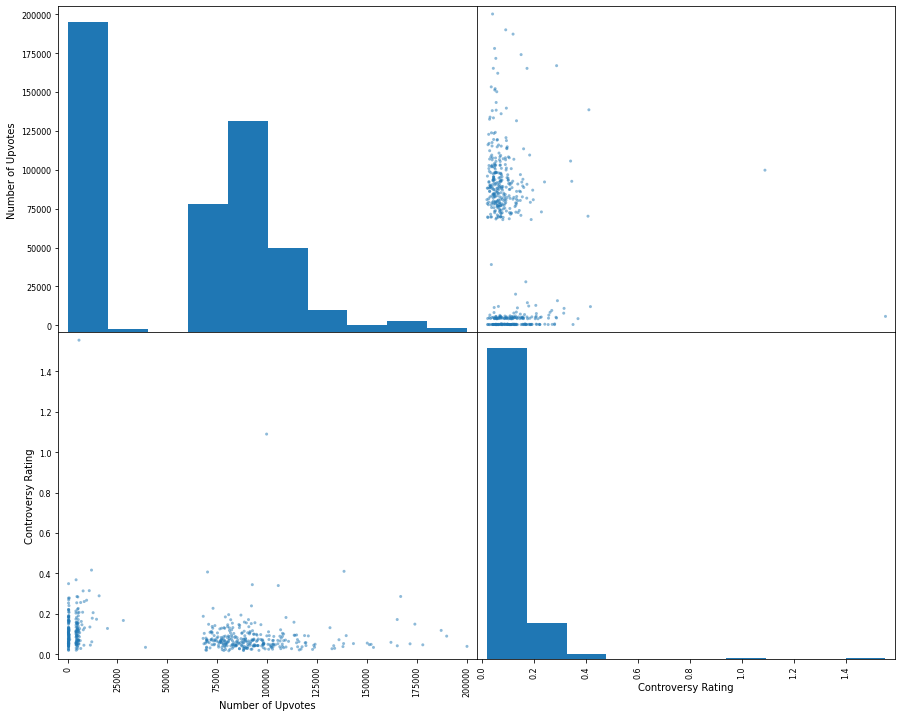

In [65]:
# Popularity as Number of Upvotes
attributes = ['Number of Upvotes', 'Controversy Rating']
scatter_matrix(reddit[attributes], figsize=(15, 12))
# save_fig("scatter_matrix_plot")

In [66]:
d = np.polyfit(reddit['Number of Upvotes'],reddit['Controversy Rating'],1)
f = np.poly1d(d)

In [67]:
reddit.insert(6,'NReg',f(reddit['Number of Upvotes']))

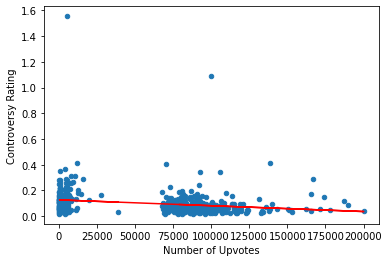

In [68]:
# Plot Controversy Rating vs Number of Upvotes
ax=reddit.plot.scatter(x='Number of Upvotes', y='Controversy Rating')
reddit.plot(x='Number of Upvotes',y='NReg',color='Red',legend=False,ax=ax)

In [69]:
# Looking at correlation matrix for Number of Upvotes
corr_matrix = reddit.corr()
corr_matrix.shape
corr_matrix['Number of Upvotes'].sort_values(ascending=False)

Number of Upvotes          1.000000
Interactions               0.993844
Unnamed: 0                 0.747538
Number of Comments         0.569310
Upvote to Comment Ratio    0.300299
Percent Upvoted            0.024528
Controversy Rating        -0.211251
NReg                      -1.000000
Name: Number of Upvotes, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93d41f6b90>,
      dtype=object)

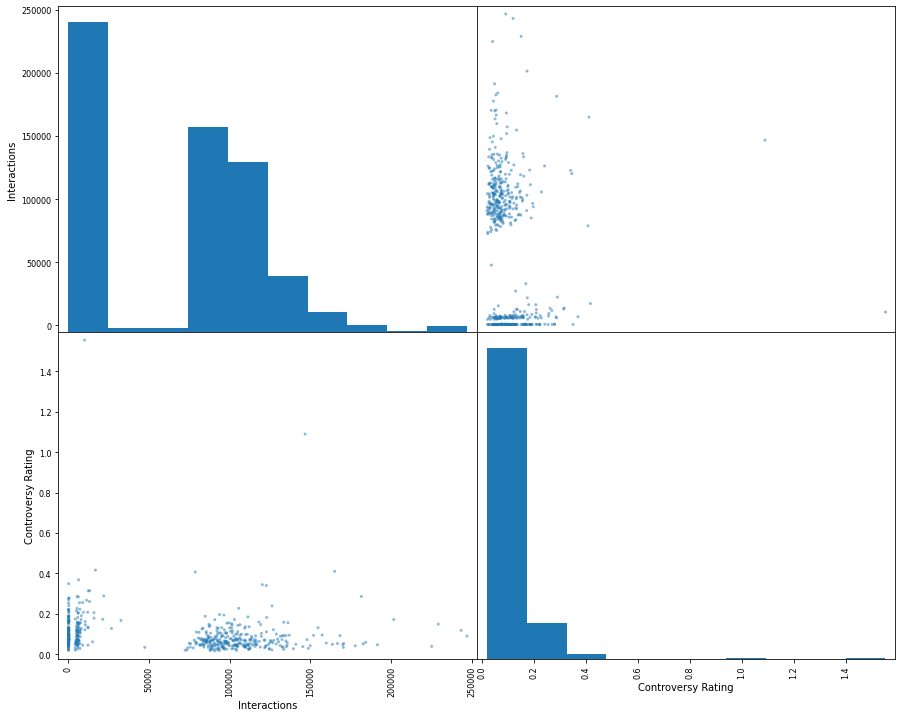

In [70]:
# Popularity as Total Number of Interactions (Num Upvotes/Percent Upvotes)
attributes = ['Interactions', 'Controversy Rating']
scatter_matrix(reddit[attributes], figsize=(15, 12))
# save_fig("scatter_matrix_plot")

In [71]:
d = np.polyfit(reddit['Interactions'],reddit['Controversy Rating'],1)
f = np.poly1d(d)

In [72]:
reddit.insert(6,'IReg',f(reddit['Interactions']))

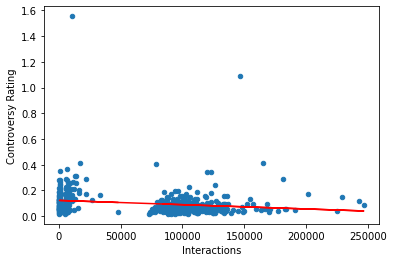

In [73]:
# Plot Controversy Rating vs Interactions
ax=reddit.plot.scatter(x='Interactions', y='Controversy Rating')
reddit.plot(x='Interactions',y='IReg',color='Red',legend=False,ax=ax)

In [74]:
# Looking at correlation matrix for Interactions
corr_matrix['Interactions'].sort_values(ascending=False)

Interactions               1.000000
Number of Upvotes          0.993844
Unnamed: 0                 0.729925
Number of Comments         0.598909
Upvote to Comment Ratio    0.264084
Percent Upvoted           -0.038163
Controversy Rating        -0.177935
NReg                      -0.993844
Name: Interactions, dtype: float64

In [75]:
# Looking at correlation matrix for Controversy Rating
corr_matrix['Controversy Rating'].sort_values(ascending=False)

Controversy Rating         1.000000
Number of Comments         0.389374
NReg                       0.211251
Interactions              -0.177935
Number of Upvotes         -0.211251
Unnamed: 0                -0.280291
Percent Upvoted           -0.365886
Upvote to Comment Ratio   -0.544903
Name: Controversy Rating, dtype: float64

In [76]:
from dataclasses import dataclass
# Used Geeks for Geeks code to remove IQR outliers after reviewing our graphs: 
#https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

def remove_outliers(data):
  Q1 = np.percentile(data['Controversy Rating'], 25,
                    interpolation = 'midpoint')
  Q3 = np.percentile(data['Controversy Rating'], 75,
                    interpolation = 'midpoint')
  IQR = Q3 - Q1
 
  # Upper bound
  upper = np.where(data['Controversy Rating'] >= (Q3+1.5*IQR))
  # Lower bound
  lower = np.where(data['Controversy Rating'] <= (Q1-1.5*IQR))

  data.drop(upper[0], inplace = True)
  data.drop(lower[0], inplace = True)

  return data

new_reddit = reddit
reddit_new = remove_outliers(new_reddit)


In [77]:
d = np.polyfit(reddit_new['Interactions'],reddit_new['Controversy Rating'],1)
f = np.poly1d(d)

In [78]:
reddit_new.insert(6,'FReg',f(reddit_new['Interactions']))

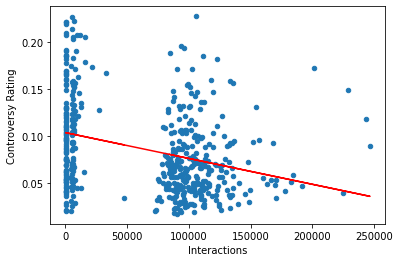

In [79]:
# Plot Controversy Rating vs Interactions after removing outliers
ax=reddit.plot.scatter(x='Interactions', y='Controversy Rating')
reddit_new.plot(x='Interactions',y='FReg',color='Red',legend=False,ax=ax)

In [80]:
# Looking at new correlation matrix for interactions
corr_matrix = reddit_new.corr()
corr_matrix.shape

corr_matrix['Interactions'].sort_values(ascending=False)

Interactions               1.000000
Number of Upvotes          0.994056
Number of Comments         0.789153
Unnamed: 0                 0.734137
Upvote to Comment Ratio    0.257045
Percent Upvoted           -0.075766
Controversy Rating        -0.315129
NReg                      -0.994056
FReg                      -1.000000
IReg                      -1.000000
Name: Interactions, dtype: float64

After creating a better-encompassing variable for post popularity and removing controversy rating outliers, we can see that the correlation coefficient between controversy rating and number of interactions is -.315

In [81]:
conservative = pd.read_csv("conservative100year.csv")
liberal = pd.read_csv("liberal100year.csv")
news = pd.read_csv("news100year.csv")
politics = pd.read_csv("politics100year.csv")
worldnews = pd.read_csv("worldnews100year.csv")

In [82]:
conservative['Interactions'] = conservative['Number of Upvotes']/conservative['Percent Upvoted']
liberal['Interactions'] = liberal['Number of Upvotes']/liberal['Percent Upvoted']
news['Interactions'] = news['Number of Upvotes']/news['Percent Upvoted']
politics['Interactions'] = politics['Number of Upvotes']/politics['Percent Upvoted']
worldnews['Interactions'] = worldnews['Number of Upvotes']/worldnews['Percent Upvoted']

Splitting correlations up by individual subreddits for better clarity:

In [83]:
corr_matrix_c = conservative.corr()
corr_matrix_c['Interactions'].sort_values(ascending=False)

Interactions               1.000000
Number of Upvotes          0.984054
Number of Comments         0.591045
Controversy Rating         0.123383
Upvote to Comment Ratio   -0.066800
Percent Upvoted           -0.129131
Name: Interactions, dtype: float64

In [84]:
corr_matrix_l = liberal.corr()
corr_matrix_l['Interactions'].sort_values(ascending=False)

Interactions               1.000000
Number of Upvotes          0.994968
Number of Comments         0.512230
Controversy Rating         0.183740
Upvote to Comment Ratio   -0.203058
Percent Upvoted           -0.287204
Name: Interactions, dtype: float64

In [85]:
corr_matrix_p = politics.corr()
corr_matrix_p['Interactions'].sort_values(ascending=False)

Interactions               1.000000
Number of Upvotes          0.887674
Number of Comments         0.165824
Controversy Rating         0.034892
Upvote to Comment Ratio   -0.098066
Percent Upvoted           -0.445705
Name: Interactions, dtype: float64

In [86]:
corr_matrix_n = news.corr()
corr_matrix_n['Interactions'].sort_values(ascending=False)

Interactions               1.000000
Number of Upvotes          0.958650
Number of Comments         0.435365
Controversy Rating         0.246292
Upvote to Comment Ratio   -0.226920
Percent Upvoted           -0.404414
Name: Interactions, dtype: float64

In [87]:
corr_matrix_w = worldnews.corr()
corr_matrix_w['Interactions'].sort_values(ascending=False)

Interactions               1.000000
Number of Upvotes          0.967351
Number of Comments         0.346927
Upvote to Comment Ratio    0.010370
Controversy Rating        -0.054926
Percent Upvoted           -0.205822
Name: Interactions, dtype: float64

After removing outliers:

In [88]:
corr_matrix_c = remove_outliers(conservative).corr()
corr_matrix_c['Interactions'].sort_values(ascending=False)

Interactions               1.000000
Number of Upvotes          0.985440
Number of Comments         0.682983
Controversy Rating         0.181864
Upvote to Comment Ratio   -0.051230
Percent Upvoted           -0.122071
Name: Interactions, dtype: float64

In [89]:
corr_matrix_l = remove_outliers(liberal).corr()
corr_matrix_l['Interactions'].sort_values(ascending=False)

Interactions               1.000000
Number of Upvotes          0.995999
Number of Comments         0.526119
Controversy Rating         0.194591
Upvote to Comment Ratio   -0.203631
Percent Upvoted           -0.324174
Name: Interactions, dtype: float64

In [90]:
corr_matrix_p = remove_outliers(politics).corr()
corr_matrix_p['Interactions'].sort_values(ascending=False)

Interactions               1.000000
Number of Upvotes          0.906448
Number of Comments         0.326630
Controversy Rating         0.121503
Upvote to Comment Ratio   -0.109060
Percent Upvoted           -0.440580
Name: Interactions, dtype: float64

In [91]:
corr_matrix_n = remove_outliers(news).corr()
corr_matrix_n['Interactions'].sort_values(ascending=False)

Interactions               1.000000
Number of Upvotes          0.965995
Number of Comments         0.545760
Controversy Rating         0.194981
Upvote to Comment Ratio   -0.158331
Percent Upvoted           -0.431796
Name: Interactions, dtype: float64

In [92]:
corr_matrix_w = remove_outliers(worldnews).corr()
corr_matrix_w['Interactions'].sort_values(ascending=False)

Interactions               1.000000
Number of Upvotes          0.967185
Number of Comments         0.391924
Upvote to Comment Ratio   -0.000113
Controversy Rating        -0.030026
Percent Upvoted           -0.205624
Name: Interactions, dtype: float64

After splitting up the dataset into each individual subreddit, we see very different correlations. We see a weak positive correlation between Interactions and Controversy Rating for the conservative, liberal, news, and politics subreddits. We see a very weak negative correlation in only the worldnews subreddit. After accounting for potential outliers, these trends remain the same for each of the subreddits. 